If you want to upload train.csv from your computer, choose the file upload dialog now.


Saving train.csv to train.csv

Dataset shape: (891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


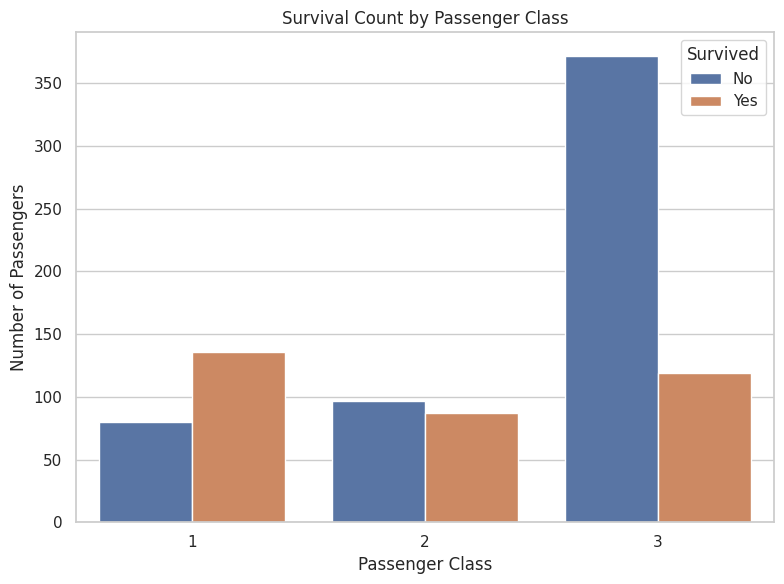

Insight 1: 1st-class passengers show higher survival counts relative to 3rd-class passengers — class influenced survival.


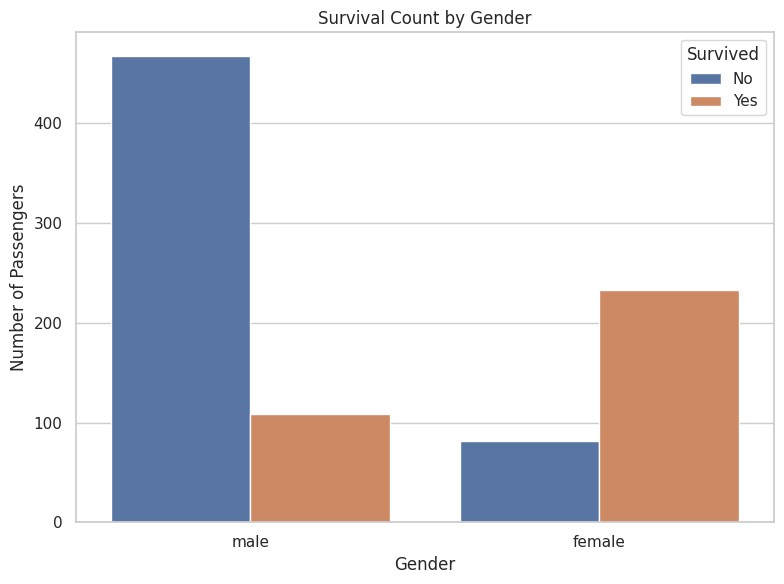

Insight 2: Females survived at a much higher rate than males, showing a strong gender effect on survival.


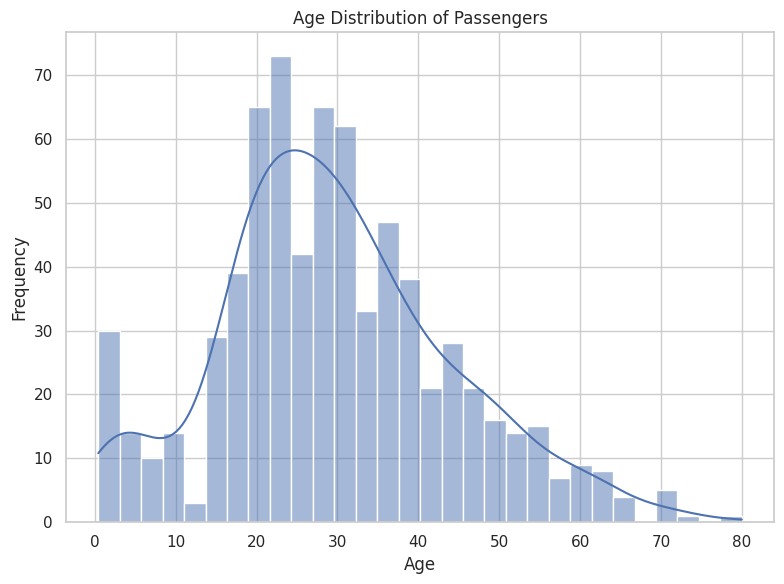

Insight 3: Most passengers are between about 20 and 40 years; a small group of children exists under age 10.


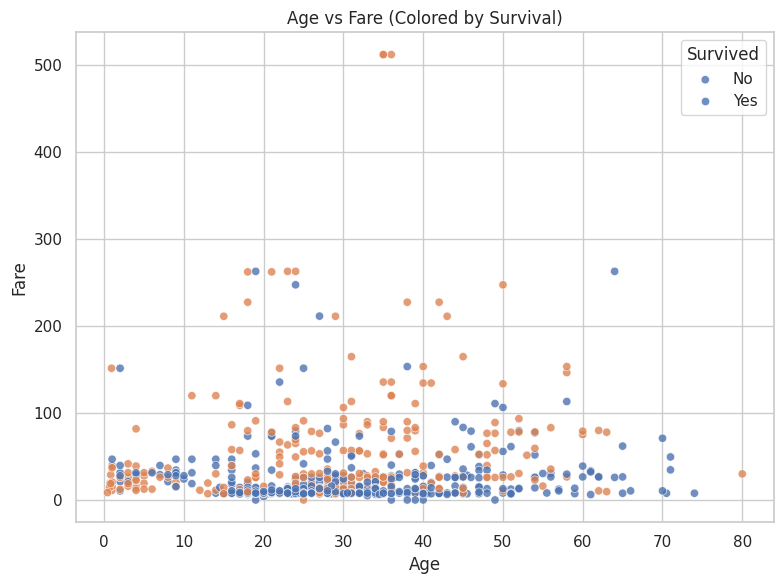

Insight 4: Higher-fare passengers tend to cluster with higher survival; fare (a proxy for wealth/class) correlates with survival chances.


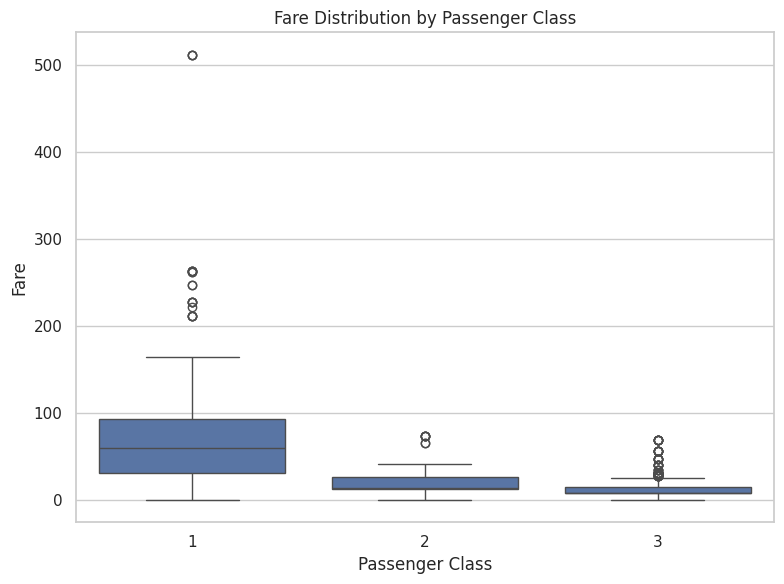

Insight 5: 1st class shows much higher median fares and wider spread; 3rd class fares are lowest — confirming economic differences by class.


In [1]:
# === Google Colab Notebook: Titanic - 5 Plots (Matplotlib & Seaborn) ===

# 0) Install / import libs (Colab already has these by default, but keep for completeness)
!pip install -q seaborn matplotlib pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")  # nicer default style

# =========================
# 1) Load dataset
# =========================
# Option A: Upload file from your computer (will prompt file chooser)
from google.colab import files
print("If you want to upload train.csv from your computer, choose the file upload dialog now.")
uploaded = files.upload()  # choose train.csv from your machine
if 'train.csv' in uploaded:
    df = pd.read_csv('train.csv')
else:
    # Option B: If you have the file on Google Drive, uncomment and use the Drive mount approach.
    # from google.colab import drive
    # drive.mount('/content/drive')
    # df = pd.read_csv('/content/drive/MyDrive/path_to_your/train.csv')
    raise FileNotFoundError("train.csv not uploaded. Re-run the cell and upload train.csv or mount Drive and load from path.")

# Quick peek
print("\nDataset shape:", df.shape)
print(df.columns.tolist())
display(df.head())

# =========================
# 2) Basic cleaning / helpers
# =========================
# Convert Survived to categorical for nicer legends (optional)
df['Survived'] = df['Survived'].astype(int)
# We'll drop rows with missing Age when plotting Age-related charts:
df_age = df.dropna(subset=['Age']).copy()

# =========================
# 3) Plot 1 - Bar Chart: Survival count by Passenger Class (Pclass)
# =========================
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Pclass', hue='Survived')
ax.set_title("Survival Count by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Number of Passengers")
ax.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

print("Insight 1: 1st-class passengers show higher survival counts relative to 3rd-class passengers — class influenced survival.")

# =========================
# 4) Plot 2 - Bar Chart: Survival count by Gender (Sex)
# =========================
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Sex', hue='Survived')
ax.set_title("Survival Count by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Passengers")
ax.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

print("Insight 2: Females survived at a much higher rate than males, showing a strong gender effect on survival.")

# =========================
# 5) Plot 3 - Histogram: Age Distribution
# =========================
plt.figure(figsize=(8,6))
ax = sns.histplot(df_age['Age'], bins=30, kde=True)
ax.set_title("Age Distribution of Passengers")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Insight 3: Most passengers are between about 20 and 40 years; a small group of children exists under age 10.")

# =========================
# 6) Plot 4 - Scatter: Age vs Fare, colored by Survival
# =========================
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df_age, x='Age', y='Fare', hue='Survived', alpha=0.8)
ax.set_title("Age vs Fare (Colored by Survival)")
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

print("Insight 4: Higher-fare passengers tend to cluster with higher survival; fare (a proxy for wealth/class) correlates with survival chances.")

# =========================
# 7) Plot 5 - Box Plot: Fare distribution by Passenger Class
# =========================
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='Pclass', y='Fare')
ax.set_title("Fare Distribution by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Fare")
plt.tight_layout()
plt.show()

print("Insight 5: 1st class shows much higher median fares and wider spread; 3rd class fares are lowest — confirming economic differences by class.")

# =========================
# 8) Optional: Save plots to files (uncomment if you want images saved)
# =========================
# plt.figure(1)  # not recommended in this block; instead re-run specific plotting cell and save with plt.savefig('plot_name.png')

# End of notebook code.
